In [24]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
X /= 255
y = digits.target

### Modelling

In [28]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree._tree import TREE_LEAF
import numpy as np

In [121]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

def plot_mean_std(x, y_mean, y_std, label, title, xlabel, ylabel):
  plt.figure()
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  
  plt.grid()
  
  y_mean = np.array(y_mean)
  y_std = np.array(y_std)
  plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.1, color="g")
  plt.plot(x, y_mean, 'o-', color="g", label=label)

  plt.legend(loc="best")

### Cross Validation (K-fold)

In [102]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

k_fold = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

### kNN

[ 0.97222222  0.98055556  0.98055556  0.98055556  0.98333333  0.98611111
  0.98333333  0.98055556  0.975       0.98888889]


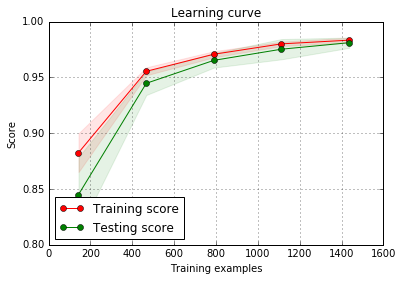

In [103]:
if __name__ == "__main__":
    clf = KNeighborsClassifier(n_neighbors = 13)
    scoring = 'accuracy'
    score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
    print(score)
    plot_learning_curve(clf, "Learning curve", X, y, None, cv=k_fold, n_jobs=4)
    plt.show()

In [104]:
# kNN Score
round(np.mean(score)*100, 2)

98.11

### Decision Tree

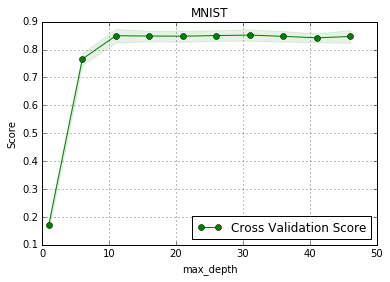

[ 0.84722222  0.82777778  0.88055556  0.86111111  0.83888889  0.85277778
  0.84444444  0.85277778  0.875       0.85277778]


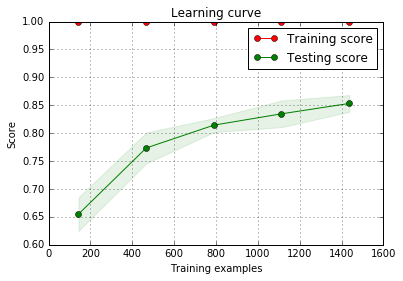

In [122]:
if __name__ == "__main__":
    max_depth = []
    scores_mean = []
    scores_std = []
    for _ in range(1, 50, 5):
      clf = DecisionTreeClassifier(max_depth=_)
      cv_score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
      scores_mean.append(cv_score.mean())
      scores_std.append(cv_score.std())
      max_depth.append(_)
    plot_mean_std(max_depth, scores_mean, scores_std, 
              'Cross Validation Score', 'MNIST', 'max_depth', 'Score')
    plt.show()

    clf = DecisionTreeClassifier(random_state=0)
    score = cross_val_score(clf, X,y, cv=k_fold, n_jobs=1, scoring='accuracy')
    #prune_dt(clf.tree_,0,1000)
    print(score)
    plot_learning_curve(clf, "Learning curve", X, y, None, cv=k_fold, n_jobs=4)
    plt.show()

In [123]:
# decision tree Score
round(np.mean(score)*100, 2)

85.33

### Boosting

[ 0.98055556  0.97777778  0.98333333  0.98333333  0.98611111  0.98611111
  0.975       0.98333333  0.97222222  0.98333333]


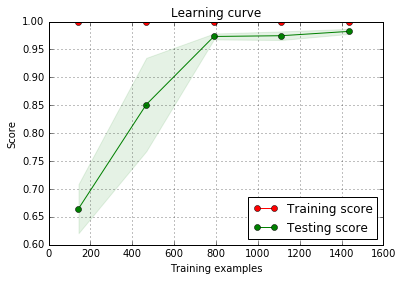

In [118]:
from sklearn.metrics import accuracy_score
if __name__ == "__main__":
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=0), learning_rate=1.5, n_estimators=100)
    scoring = 'accuracy'
    score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=4, scoring=scoring)
    print(score)
    plot_learning_curve(clf, "Learning curve", X, y, ylim=(0.7, 1.01), cv=k_fold, n_jobs=4)
    plt.show()

In [119]:
# boosting score
round(np.mean(score)*100, 2)

98.11

### SVM

[ 0.08055556  0.07222222  0.08077994  0.08077994  0.08077994]


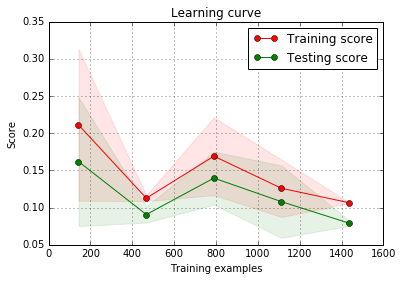

In [27]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
plot_learning_curve(clf, "Learning curve", X, y, None, cv=k_fold, n_jobs=4)
plt.show()

In [47]:
round(np.mean(score)*100,2)

83.5

### Neural Networks

[ 0.92777778  0.92777778  0.94444444  0.94722222  0.95        0.94722222
  0.93611111  0.93611111  0.95833333  0.94722222]


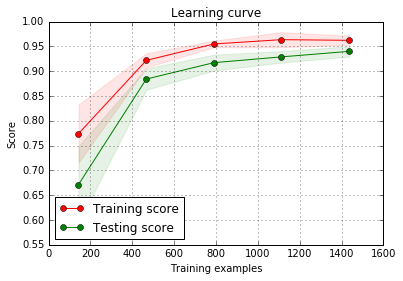

In [126]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
plot_learning_curve(clf, "Learning curve", X, y, None, cv=k_fold, n_jobs=4)
plt.show()

In [70]:
round(np.mean(score)*100,2)

70.82